In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
evp_pd = pd.read_csv('Electric_Vehicle_Population_Data.csv') 

In [60]:
evp_pd.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [61]:
evp_pd.shape

(235692, 17)

In [62]:
evp_pd.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [63]:
evp_pd.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [64]:
evp_pd.duplicated().sum()

0

In [65]:
evp_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [66]:
#drop columns by index in-place
evp_pd.drop(evp_pd.columns[[0,4,9,11,12,13,14,15,16]], axis=1, inplace=True)

In [67]:
evp_pd.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,King,Seattle,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.0
1,Kitsap,Poulsbo,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),291.0
2,Kitsap,Olalla,WA,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),0.0
3,Kitsap,Seabeck,WA,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),30.0
4,Thurston,Rainier,WA,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42.0


In [68]:
evp_pd.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'Electric Range'],
      dtype='object')

In [69]:
evp_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 235689 non-null  object 
 1   City                   235689 non-null  object 
 2   State                  235692 non-null  object 
 3   Model Year             235692 non-null  int64  
 4   Make                   235692 non-null  object 
 5   Model                  235692 non-null  object 
 6   Electric Vehicle Type  235692 non-null  object 
 7   Electric Range         235656 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 14.4+ MB


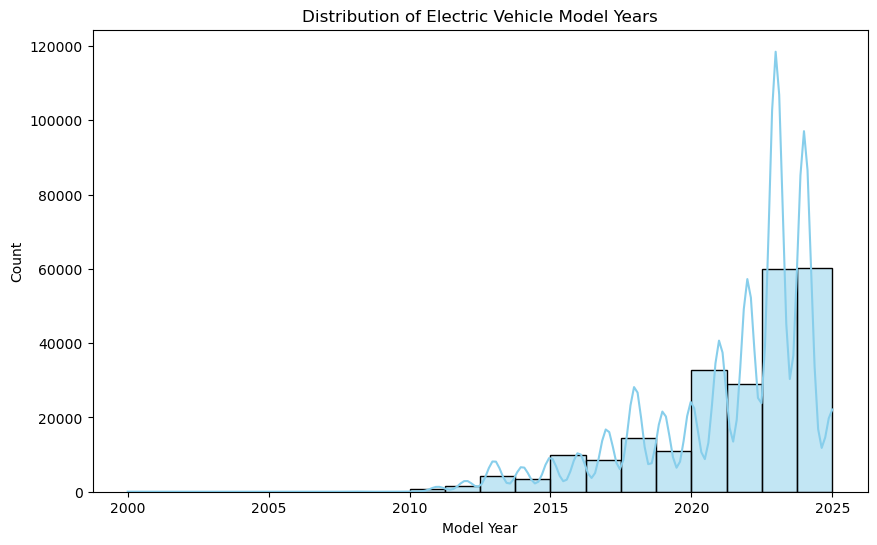

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(evp_pd['Model Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Electric Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

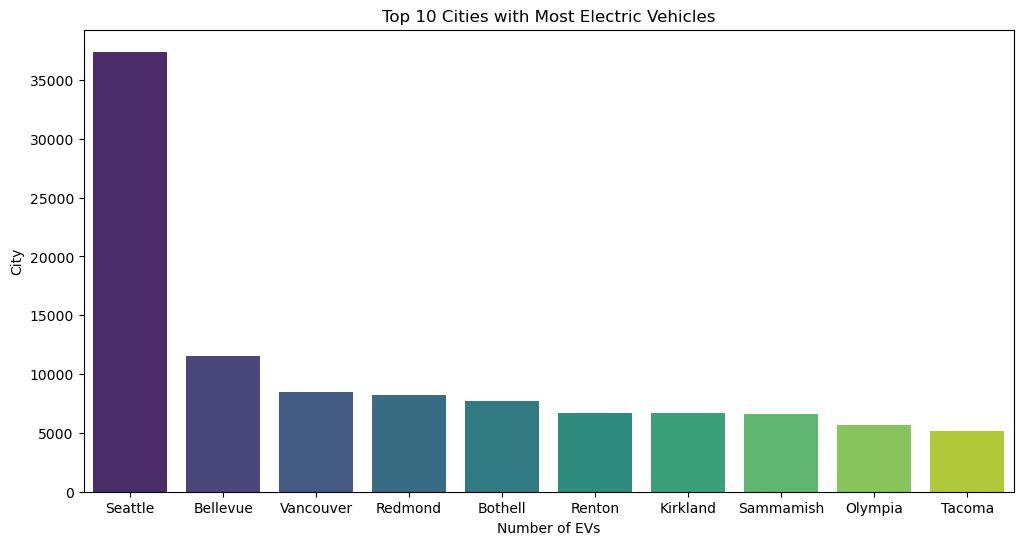

In [71]:
top_cities = evp_pd['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot( x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with Most Electric Vehicles')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()


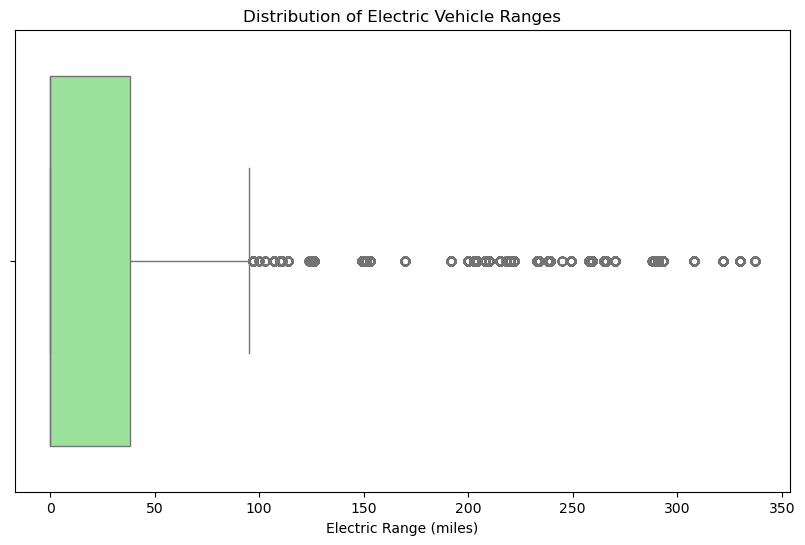

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=evp_pd, x='Electric Range', color='lightgreen')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.show()

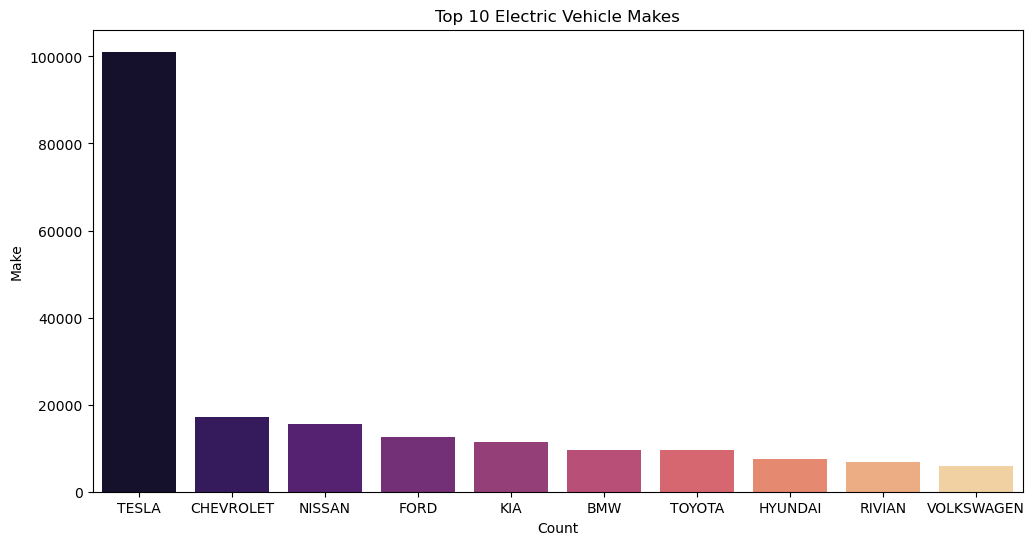

In [73]:
top_makes = evp_pd['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot( x=top_makes.index,y=top_makes.values, palette='magma')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

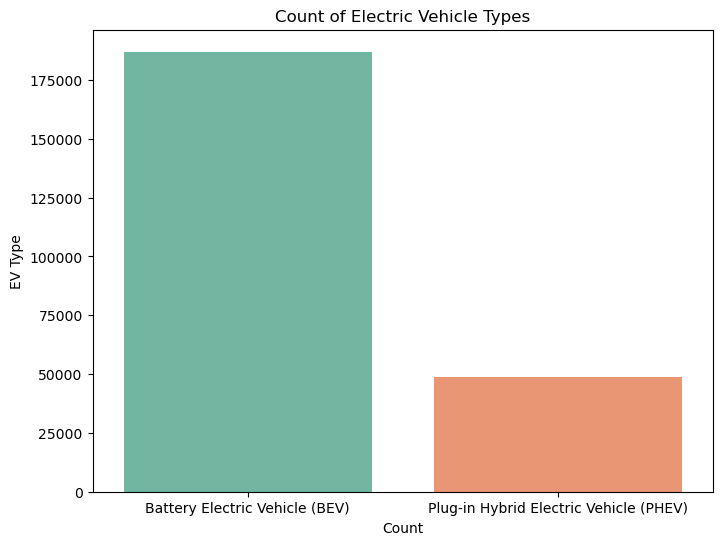

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(data=evp_pd, x='Electric Vehicle Type', palette='Set2')
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Count')
plt.ylabel('EV Type')
plt.show()

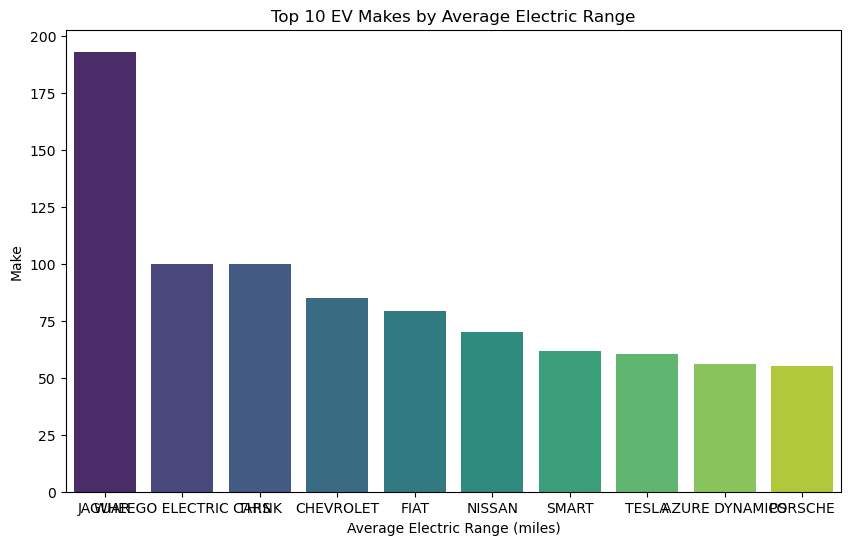

In [75]:
avg_range = evp_pd.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot( x=avg_range.index,y=avg_range.values, palette='viridis')
plt.title('Top 10 EV Makes by Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Make')
plt.show()